In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import geopandas as gpd
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [3]:
sys.path.insert(1,'../analysis/')

In [4]:
from results_plotting import *

# Directory Pointers

In [5]:
results_paths = '../../results/plant_optimization/final_results'

## Europe grid shapefile

In [6]:
europe_grid, europe_borders = load_base_maps()
europe_grid = europe_grid[['lat','lon','country','sea_node','geometry']]
merge_cols = list(europe_grid.columns)
merge_cols.remove('geometry')

# Maps

## 2020

### On & Offshore

<font color=red> Add secondary, tertiary legends with LCOF costs in different units (e.g. EUR/kg, EUR/ton)

In [24]:
data_2020_geo.LCOF_liter.min()

2.1776038387307737

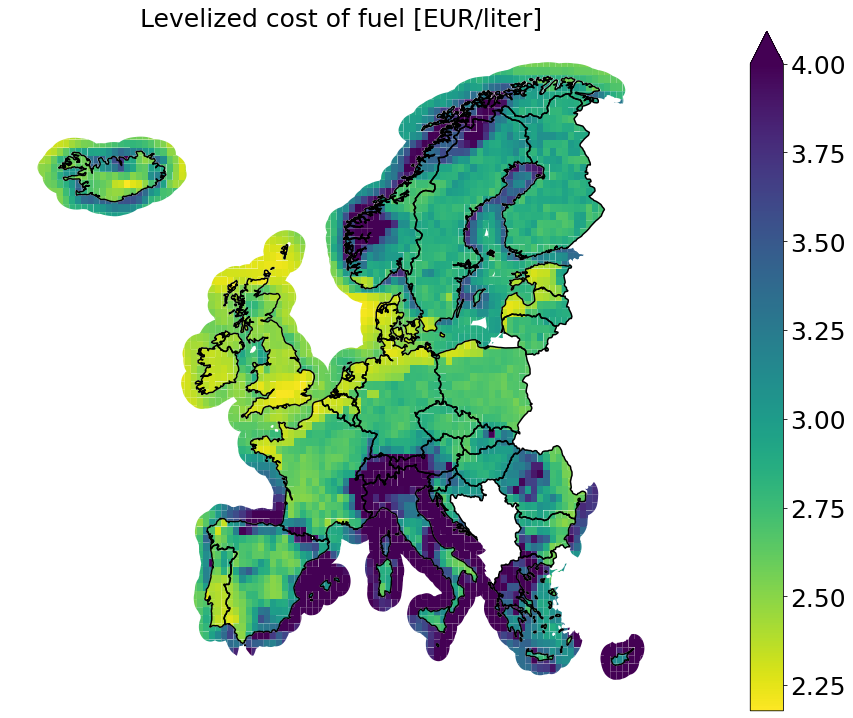

In [26]:
year = '2020'
data_2020 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2020_geo = gpd.GeoDataFrame(data_2020.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2020_geo,figsize=(15,15), fontsize=25, min_lcof=data_2020_geo.LCOF_liter.min(), max_lcof=4, cmap='viridis_r')
plt.savefig('../../gfx/2020_LCOF_map.png',dpi=400,bbox_inches='tight')

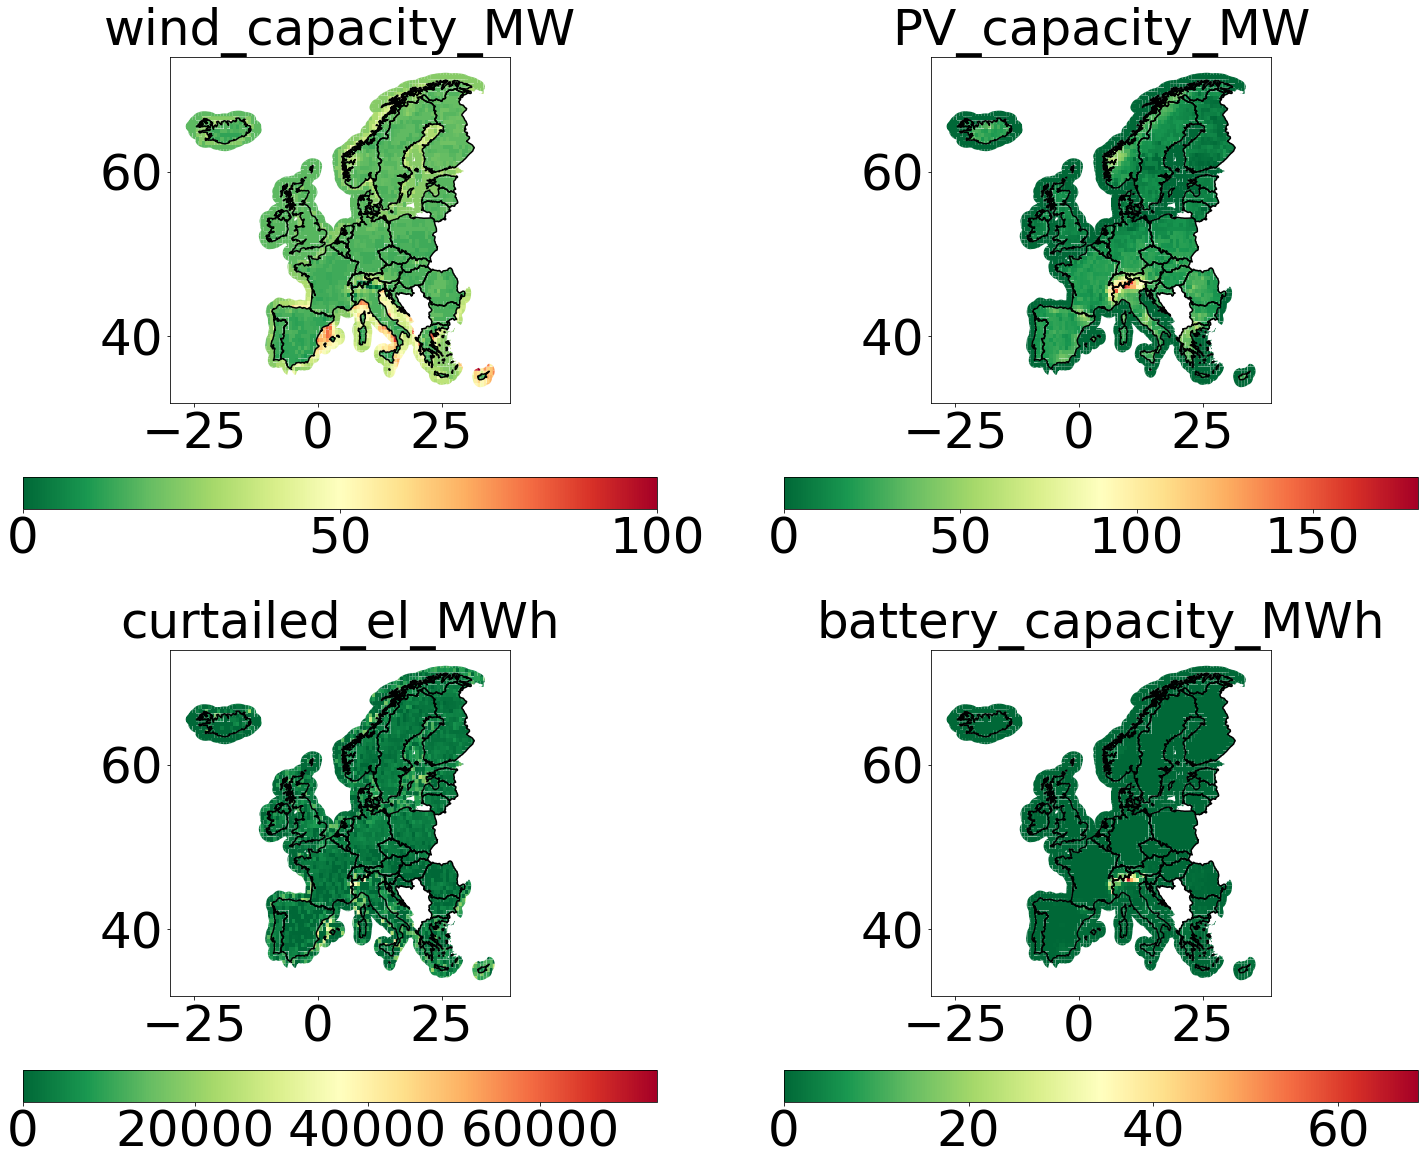

In [123]:
year = '2020'
plot_results(data_2020_geo,data.country.unique(),metrics={'wind_capacity_MW':'wind_capacity_MW','PV_capacity_MW':'PV_capacity_MW',
                                                 'curtailed_el_MWh':'curtailed_el_MWh','battery_capacity_MWh':'battery_capacity_MWh'})

## 2030

### On & Offshore

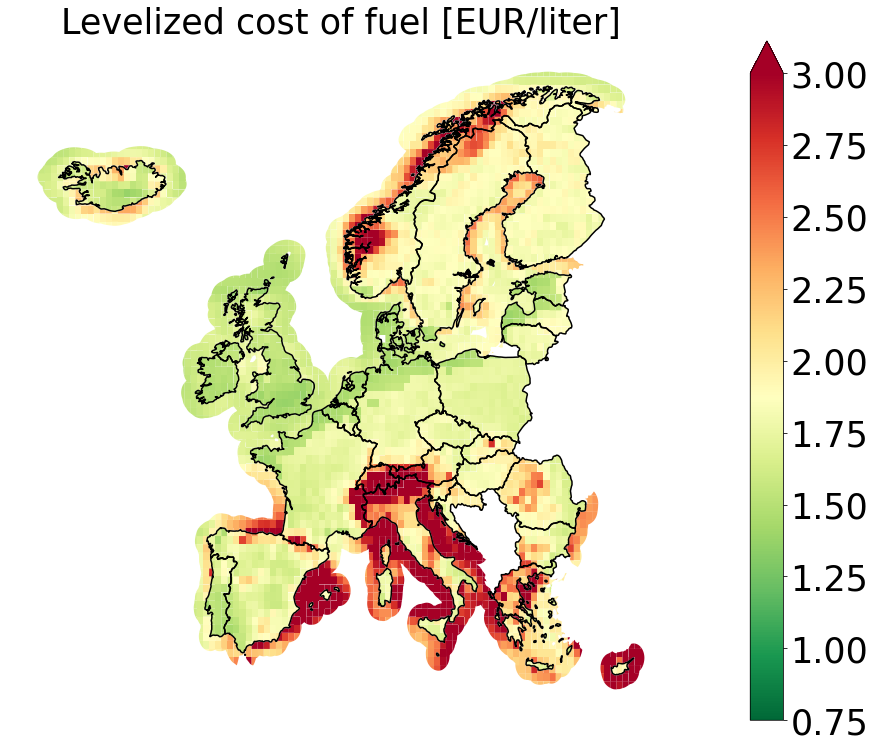

In [15]:
year = '2030'
data_2030 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2030_geo = gpd.GeoDataFrame(data_2030.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2030_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

## 2040

### On & Offshore

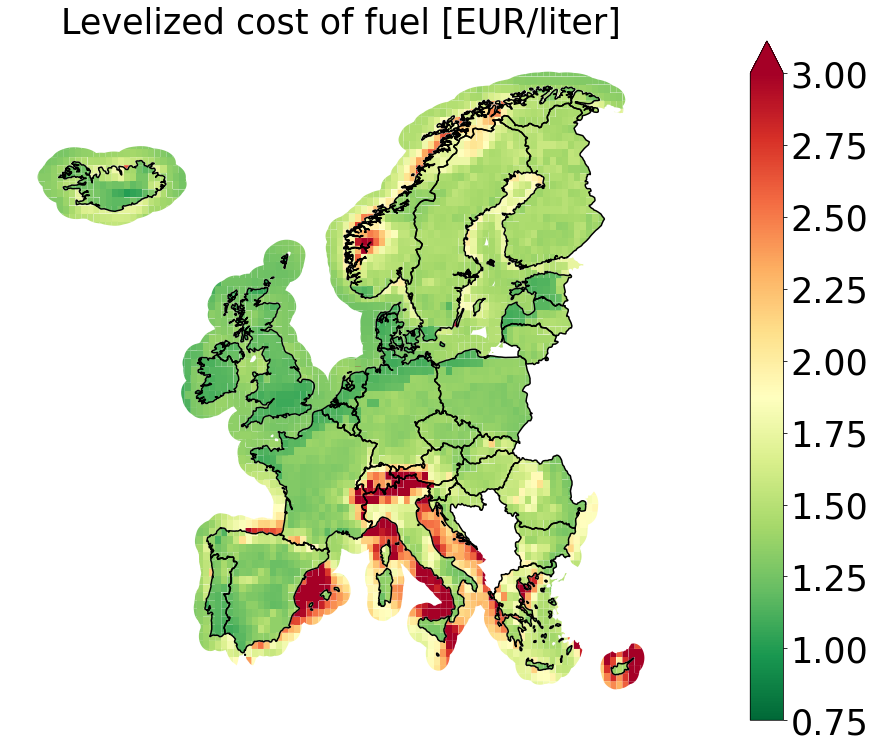

In [16]:
year = '2040'
data_2040 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2040_geo = gpd.GeoDataFrame(data_2040.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2040_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

## 2050

### On & Offshore

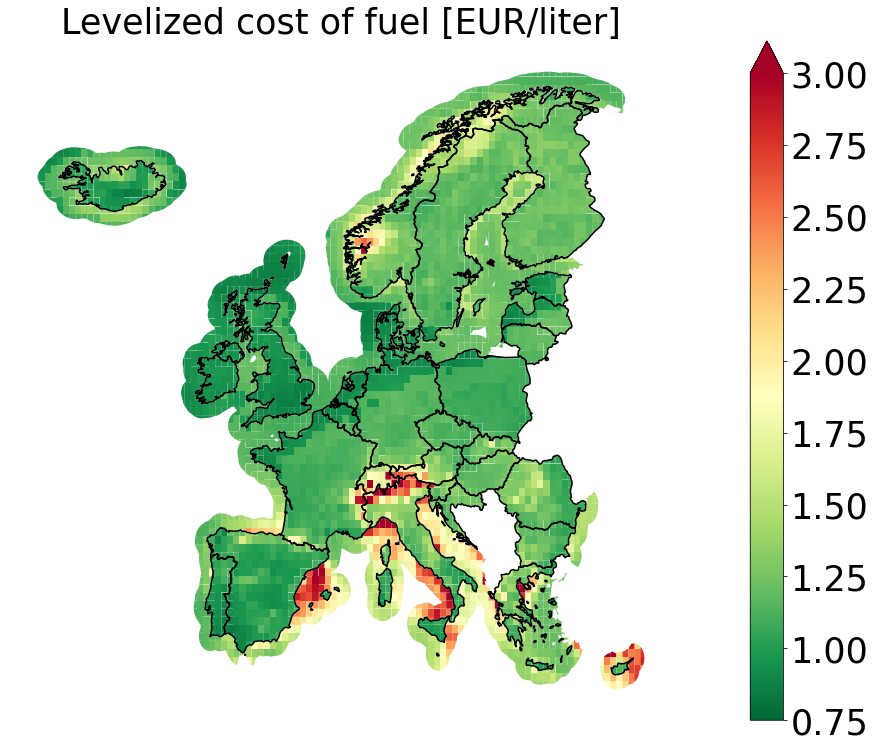

In [17]:
year = '2050'
data_2050 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2050_geo = gpd.GeoDataFrame(data_2050.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2050_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

In [18]:
data_2050_geo.LCOF_liter.min()

0.815639735374186

## All years

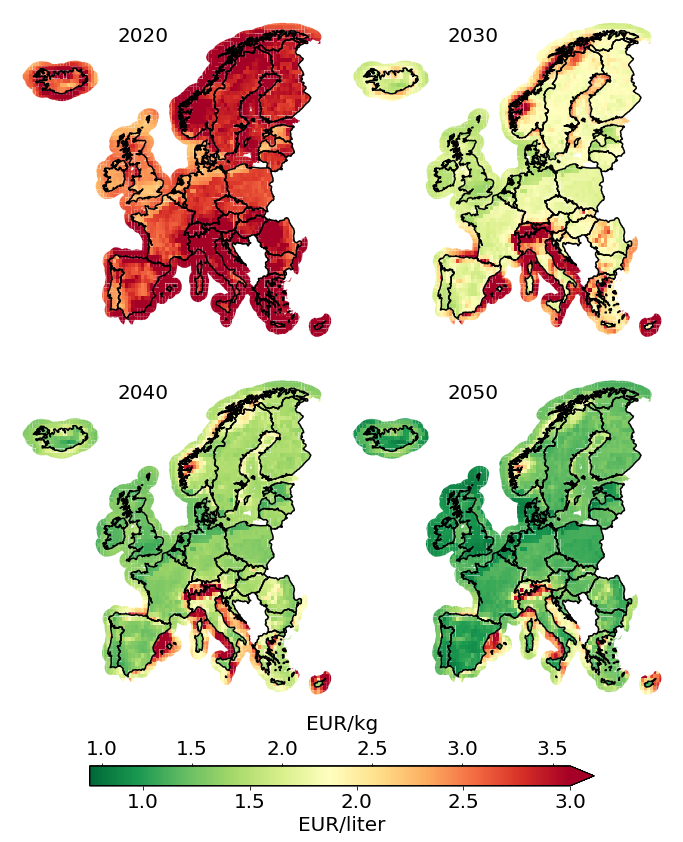

In [35]:
kerosene_density = 0.804 # [kg/L]
vmin,vmax = 0.75,3

countries = data_2020.country.unique()
figheight = 12
figsize=(figheight,figheight*1.2)
fig = plt.figure(figsize=figsize)#constrained_layout=True,
nrows = 30
ncols = 8
gs = fig.add_gridspec(nrows+3, ncols, wspace=-0.1)
axes = []
axes.append(fig.add_subplot(gs[0:int(nrows/2), 0:int(ncols/2)]))
axes.append(fig.add_subplot(gs[0:int(nrows/2), int(ncols/2):ncols]))
axes.append(fig.add_subplot(gs[int(nrows/2):nrows, 0:int(ncols/2)]))
axes.append(fig.add_subplot(gs[int(nrows/2):nrows, int(ncols/2):ncols]))
axes.append(fig.add_subplot(gs[nrows+2,1:ncols-1]))
    
fontsize = 20

for i,(data,title_year) in enumerate(zip([data_2020_geo, data_2030_geo, data_2040_geo, data_2050_geo],['2020','2030','2040','2050'])):

    df = data.loc[data.country.isin(countries)].copy()

    europe_grid, europe_borders = load_base_maps()

    borders = europe_borders.loc[europe_borders.country.isin(countries)].copy()
    cmap = 'RdYlGn_r'

    l_kwds = legend_kwds={'extend':'max','orientation':'horizontal'}
    l_kwds.pop('bbox_to_anchor',None)
    l_kwds.pop('fontsize',None)

    df.plot(column='LCOF_liter',legend=True,cmap=cmap,vmin=vmin,vmax=vmax,missing_kwds=None,legend_kwds=l_kwds,cax=axes[-1],ax=axes[i])

    borders.boundary.plot(color='k',ax=axes[i])
    axes[i].axis('off')
    axes[i].text(.4,.9,title_year,fontsize=fontsize,horizontalalignment='center',transform=axes[i].transAxes)

cb_ax = axes[-1]
cb_ax.tick_params(labelsize=fontsize)

cb_ax.set_xlabel('EUR/liter',fontsize=fontsize)
cb_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
pos = cb_ax.get_position()
cb_ax_2 = cb_ax.twiny()
cb_ax_2.set_xlabel('EUR/kg',fontsize=fontsize,labelpad=10)
cb_ax_2.set_xlim((vmin/kerosene_density,vmax/kerosene_density))
cb_ax_2.tick_params(labelsize=fontsize)
cb_ax_2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
for spine in cb_ax_2.spines.values():
    spine.set_visible(False)
    
plt.savefig('../../gfx/LCOF_map_all_years.png',bbox_inches='tight',dpi=400)

In [29]:
results_path = os.path.join('../../results/plant_optimization/0d7597c_2050') # Points to the location of the results csv files

In [30]:
rp = os.path.join('/Volumes/groups/LAV/EnergySystemsGroup/Research/Aviation/SAFlogistics/GitHub/EuroSAFs/results/02_plant_optimization')

countries = europe_grid.country.unique()

results = pd.DataFrame()
for country in countries:
    df = pd.DataFrame()
    for file_glob in glob(f'{rp}/2020_02/onshore/{country}*.csv'): 
        df = df.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df['sea_node'] = False
    df_sea = pd.DataFrame()
    # NOTE THAT THIS IS TAKING OFFSHORE RESULTS FROM RUN_01!!!
    for file_glob in glob(f'{rp}/2020_01/offshore/{country}*.csv'): 
        df_sea = df_sea.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df_sea['sea_node'] = True
    df = df.append(df_sea)
    df['country'] = country
    results = results.append(df)
results_gdf = gpd.GeoDataFrame(results.merge(europe_grid,on=['lat','lon','country','sea_node'],how='left'))

In [31]:
# This cell can be deleted once the offshore points are rerun
results_gdf.loc[(results_gdf.wind_class.isna())&(results_gdf.shore_dist<=60),'wind_class'] = 'monopole'
results_gdf.loc[(results_gdf.wind_class.isna())&(results_gdf.shore_dist>60),'wind_class'] = 'floating'

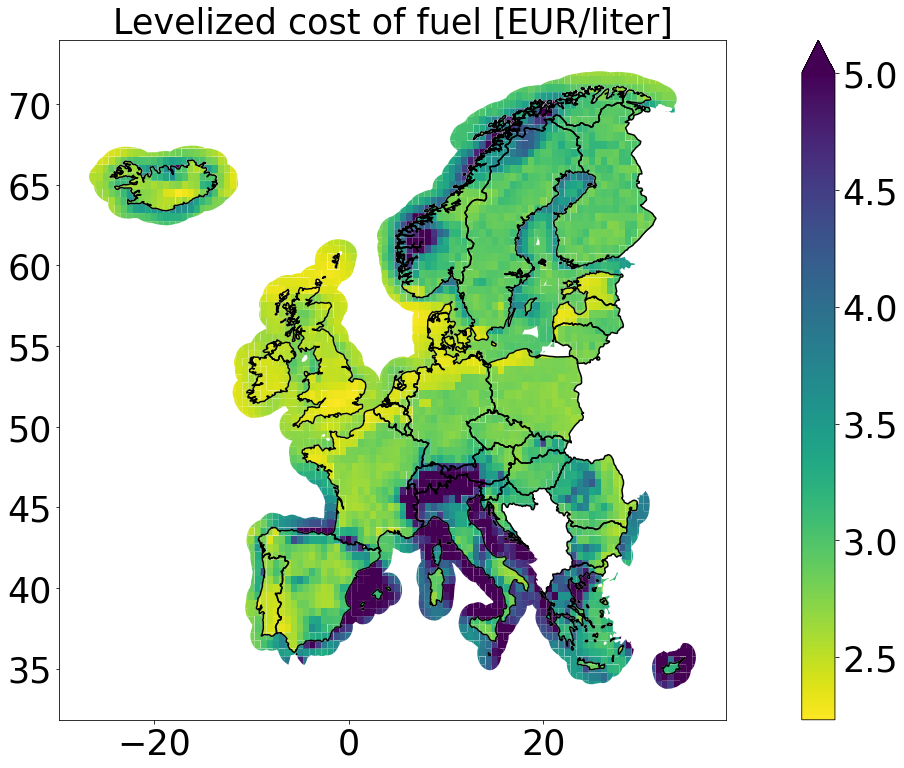

In [34]:
data = results_gdf.copy()
# countries = ['Switzerland','Austria','Germany']
metrics = {'LCOF_liter':'Levelized cost of fuel [EUR/liter]'}
vmax_dict = {'LCOF_liter':5}
legend_kwds = {'extend':'max','orientation':'vertical'}
fontsize = 35
plot_results(data=data,countries=countries,metrics=metrics,vmax_dict=vmax_dict,legend_kwds=legend_kwds,figsize=(15,15),fontsize=fontsize)
plt.tight_layout()
plt.savefig('../../gfx/LCOF_combined.png',dpi=600)
plt.savefig('../../gfx/LCOF_combined.eps',dpi=600)

<AxesSubplot:>

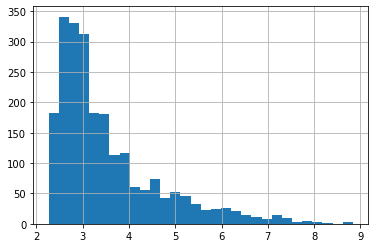

In [76]:
data.LCOF_liter.hist(bins=30)


## MAVT Article Figure

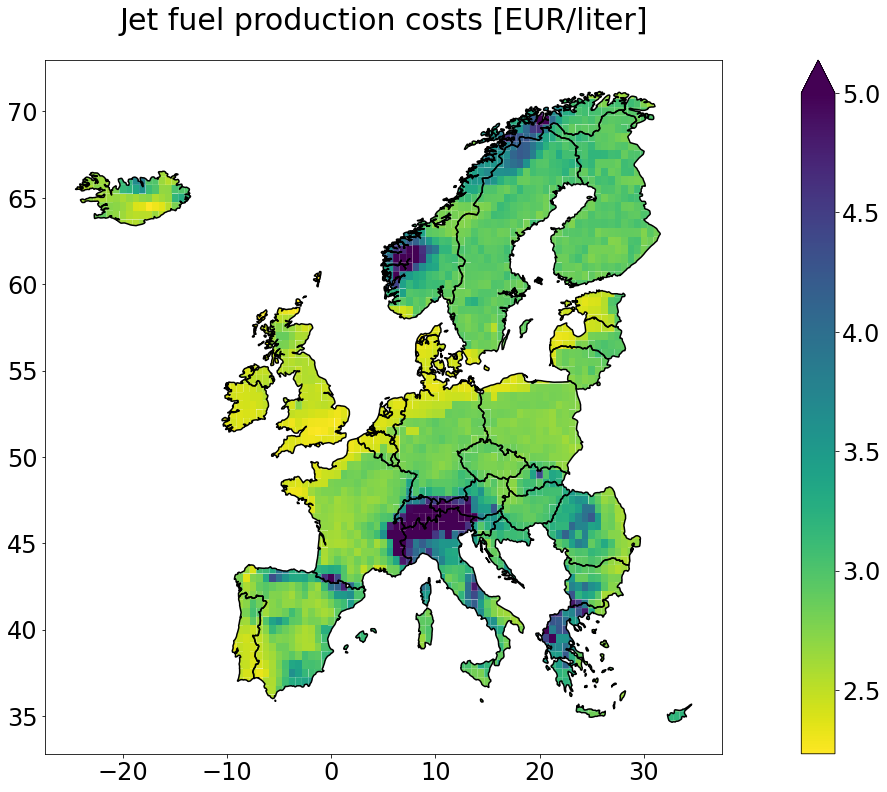

In [29]:
# MAVT Article
data = results_gdf.copy()
# countries = ['Switzerland','Austria','Germany']
metrics = {'LCOF_liter':'Jet fuel production costs [EUR/liter]'}
vmax_dict = {'LCOF_liter':5}
legend_kwds = {'extend':'max','orientation':'vertical'}
fontsize = 30
figsize = (15,15)

ncols = 1
nrows = 1
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=figsize)
axes = np.reshape(axes,(1,nrows*ncols))[0]

df = data.loc[data.country.isin(countries)].copy()
borders = europe_borders.loc[europe_borders.country.isin(countries)].copy()
cmap = 'viridis_r'
for i,(metric,description) in enumerate(metrics.items()):
    vmax = vmax_dict[metric] if metric in vmax_dict.keys() else None
    if metric not in ['turbine_type','specific_capacity_class']:
        l_kwds = legend_kwds.copy()
        l_kwds.setdefault('orientation','horizontal')
        l_kwds['ax'] = axes[i]
        l_kwds.pop('bbox_to_anchor',None)
        l_kwds.pop('fontsize',None)
        if l_kwds['orientation'] == 'vertical':
            divider = make_axes_locatable(axes[i])
            cax = divider.append_axes("right", size="3%", pad=-2)
        else:
            cax = None

    df.plot(column=metric,legend=True,cmap=cmap,vmax=vmax,legend_kwds=l_kwds,cax=cax,ax=axes[i])
    borders.boundary.plot(color='k',ax=axes[i])
    cb_ax = axes[i].figure.axes[-1]
    cb_ax.tick_params(labelsize=fontsize*.8)
    axes[i].tick_params(labelsize=fontsize*.8)
#         axes[i].axis('off')
    axes[i].set_title(description,fontsize=fontsize,pad=30)
    plt.tight_layout()
# plt.savefig('../../gfx/LCOF_onshore_box.eps',dpi=400)

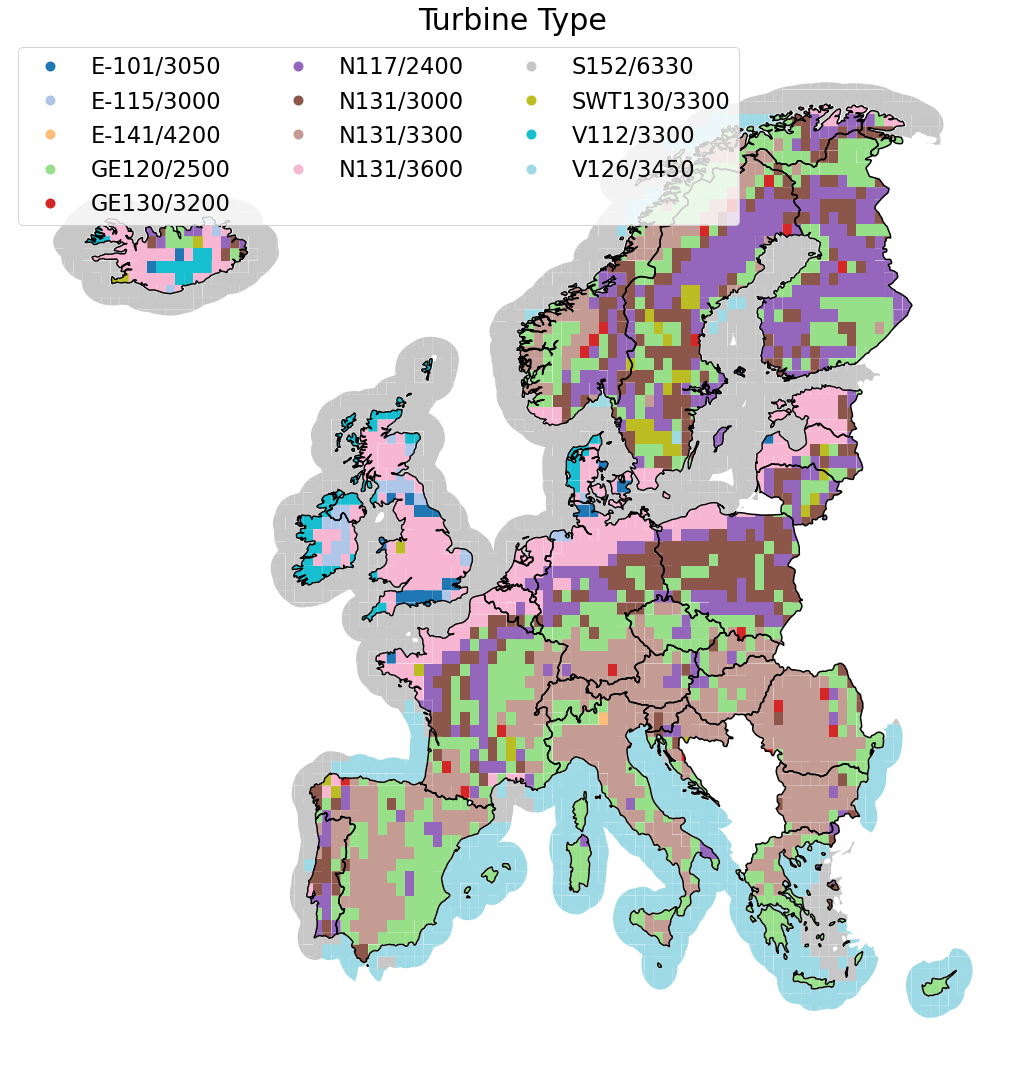

In [58]:
data = results_gdf.copy()
metrics = {'turbine_type':'Turbine Type'}
vmax_dict = None
legend_kwds = {'loc':'upper left'}
fontsize = 30
plot_results(data=data,countries=countries,metrics=metrics,legend_kwds=legend_kwds,figsize=(15,15),fontsize=fontsize)
plt.tight_layout()
# plt.savefig('../../gfx/turbine_types.png',dpi=400)

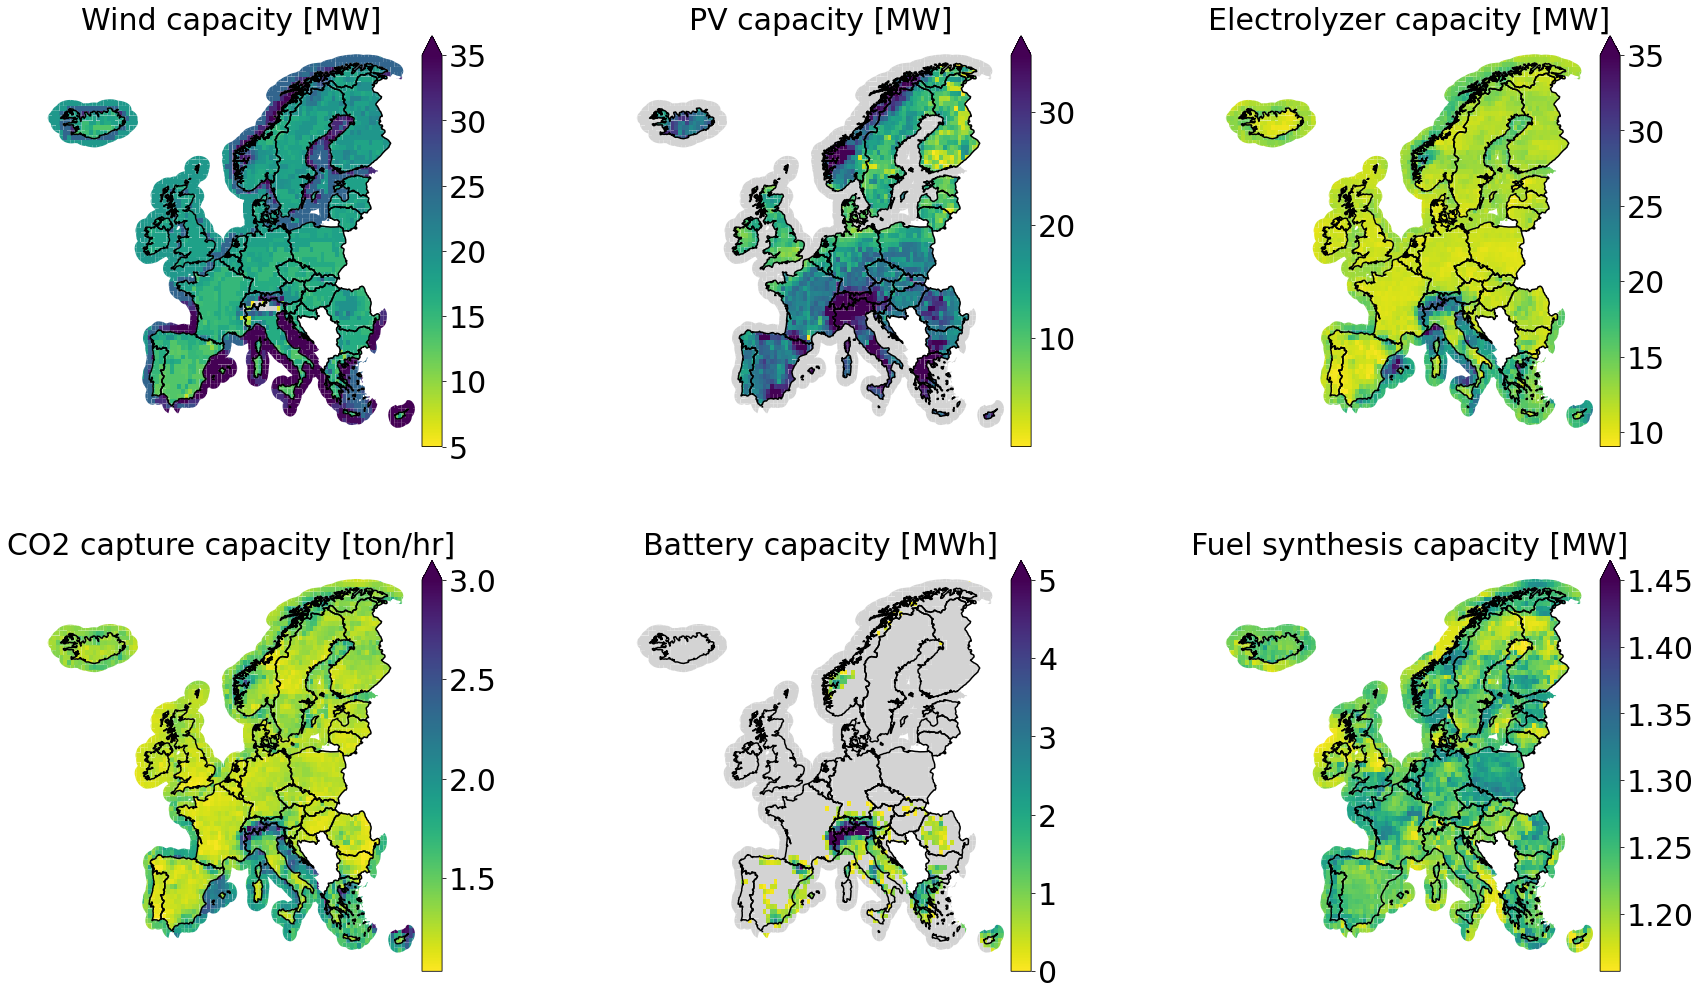

In [77]:
data = results_gdf.copy()
data.loc[data.battery_capacity_MWh==0,'battery_capacity_MWh'] = np.nan
data.loc[data.PV_capacity_MW==0,'PV_capacity_MW'] = np.nan
data.loc[data.wind_capacity_MW==0,'wind_capacity_MW'] = np.nan
metrics = {'wind_capacity_MW':'Wind capacity [MW]',
           'PV_capacity_MW':'PV capacity [MW]',
           'electrolyzer_capacity_MW':'Electrolyzer capacity [MW]',
           'CO2_capture_tonph':'CO2 capture capacity [ton/hr]',
           'battery_capacity_MWh':'Battery capacity [MWh]',
           'H2tL_capacity_MW':'Fuel synthesis capacity [MW]'}
vmax_dict = {'wind_capacity_MW':35,
             'PV_capacity_MW':35,
             'electrolyzer_capacity_MW':35,
             'CO2_capture_tonph':3,
             'battery_capacity_MWh':5,
             'H2tL_capacity_MW':1.45}
legend_kwds = {'extend':'max','orientation':'vertical'}
missing_kwds = {'color':'lightgrey'}
fontsize = 30
plot_results(data=data,countries=countries,metrics=metrics,vmax_dict=vmax_dict,missing_kwds=missing_kwds,legend_kwds=legend_kwds,figsize=(25,15),fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0.08)
plt.savefig('../../gfx/component_capacities.png',dpi=400)

# Costs

In [224]:
specs = pd.read_excel('../../data/plant_assumptions.xlsx',sheet_name='data',index_col=0)
specs_names = specs.index

In [225]:
year=2020
costs_df = results_gdf.copy()
components = {'wind':['wind_capacity_MW',1e3],
              'PV':['PV_capacity_MW',1e3],
              'battery':['battery_capacity_MWh',1e3],
              'electrolyzer':['electrolyzer_capacity_MW',1e3],
              'CO2':['CO2_capture_tonph',1e3],
              'H2stor':['H2stor_capacity_MWh',1e3],
              'CO2stor':['CO2stor_capacity_ton',1],
              'H2tL':['H2tL_capacity_MW',1e3],
              'heat':['heatpump_capacity_MW',1e3]}
discount_rate = specs.at['discount_rate',f'value_{year}']
plant_lifetime = specs.at['lifetime',f'value_{year}']

for component in components.keys():
    costs_df[component+'_NPV'] = np.nan
costs_df['verify_NPV'] = np.nan
    
for idx,row in data.iterrows():
    verify_NPV = 0
    for component,value in components.items():
        if component == 'wind':
            wind_class = row['wind_class']
            capex = specs.at[f'{component}_{wind_class}_CAPEX',f'value_{year}']
            opex = specs.at[f'{component}_{wind_class}_OPEX',f'value_{year}']
        else:
            capex = specs.at[f'{component}_CAPEX',f'value_{year}']
            opex = specs.at[f'{component}_OPEX',f'value_{year}']
        component_lifetime = specs.at[f'{component}_lifetime',f'value_{year}']
        capacity = row[value[0]]*value[1]
        if component == 'electrolyzer':
            component_npv = plop.costs_NPV(capex=capex,opex=opex,discount_rate=discount_rate,plant_lifetime=plant_lifetime,component_lifetime=component_lifetime,capacity=capacity,
                                          replacement_capex_fraction=specs.at['electrolyzer_stack_CAPEX',f'value_{year}'])                
        else:
            component_npv = plop.costs_NPV(capex=capex,opex=opex,discount_rate=discount_rate,plant_lifetime=plant_lifetime,component_lifetime=component_lifetime,capacity=capacity,)
        costs_df.loc[idx,component+'_NPV'] = component_npv
        verify_NPV += component_npv
    costs_df.loc[idx,'verify_NPV'] = verify_NPV

In [226]:
npv_cols = [x for x in costs_df.columns if 'NPV' in x]
costs_summary = costs_df[npv_cols].describe(percentiles=[0.05,0.5,0.95])
costs_summary

NPV_EUR      wind_NPV        PV_NPV   battery_NPV  \
count  5.390000e+03  5.390000e+03  5.390000e+03  5.390000e+03   
mean   1.238355e+08  8.700725e+07  1.078449e+07  2.356873e+05   
std    3.832939e+07  7.064476e+07  1.429059e+07  1.810291e+06   
min    8.498614e+07 -0.000000e+00  0.000000e+00  0.000000e+00   
5%     9.088900e+07  3.087759e+07  0.000000e+00  0.000000e+00   
50%    1.116588e+08  4.891010e+07  8.642048e+06  0.000000e+00   
95%    2.045864e+08  2.239018e+08  3.067309e+07  8.003500e+05   
max    4.349160e+08  6.155363e+08  1.615490e+08  4.483344e+07   

       electrolyzer_NPV       CO2_NPV    H2stor_NPV   CO2stor_NPV  \
count      5.390000e+03  5.390000e+03  5.390000e+03  5.390000e+03   
mean       2.052771e+07  2.470804e+06  1.270354e+07  1.274589e+06   
std        5.675752e+06  5.486909e+05  9.271847e+06  1.191971e+06   
min        1.373137e+07  1.797693e+06  1.911064e+06  1.797229e+05   
5%         1.576698e+07  1.968862e+06  4.276201e+06  3.471299e+05   
50%        1.865085e+07  2.280591e+06  1.016211e+07  7.873426e+05   
95%        3.314399e+07  3.636869e+06  2.747164e+07  4.195413e+06   
max        5.424430e+07  6.934645e+06  1.499551e+08  6.821415e+06   

           H2tL_NPV      heat_NPV    verify_NPV  
count  5.390000e+03  5.390000e+03  5.390000e+03  
mean   1.385458e+06  4.034495e+05  1.367930e+08  
std    4.083821e+04  9.851495e+04  7.715192e+07  
min    1.297470e+06  2.824600e+05  6.164296e+07  
5%     1.319047e+06  3.124899e+05  6.951463e+07  
50%    1.382710e+06  3.695447e+05  1.060601e+08  
95%    1.455299e+06  6.127255e+05  2.979666e+08  
max    1.503378e+06  1.207305e+06  6.994013e+08

<BarContainer object of 11 artists>

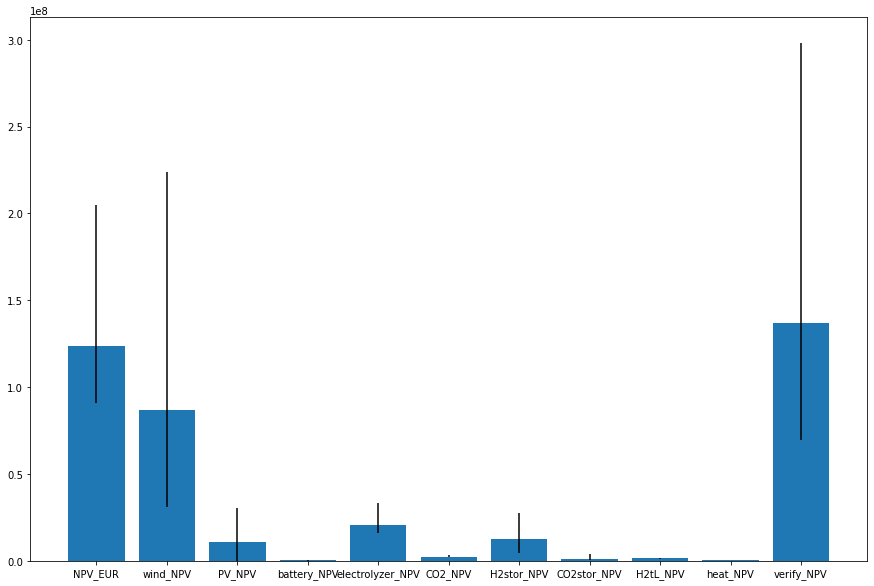

In [229]:
fig,axes = plt.subplots(figsize=(15,10))
# axes.bar(costs_summary.columns,costs_summary.loc['97.5%'],hatch='/',alpha=edgecolor='black')
axes.bar(costs_summary.columns,costs_summary.loc['mean'],yerr=[costs_summary.loc['mean']-costs_summary.loc['5%'],costs_summary.loc['95%']-costs_summary.loc['mean']])


<AxesSubplot:>

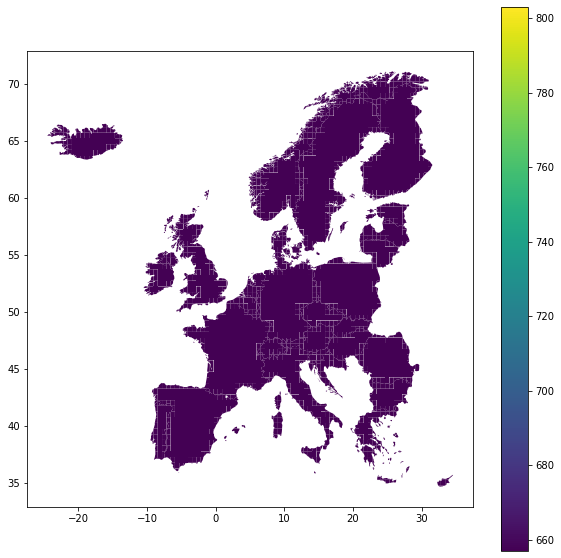

In [140]:
costs_df.plot(column='CO2_CAPEX',legend=True,figsize=(10,10))

In [126]:
costs_df = results_gdf.copy()
costs_df = pd.concat([costs_df,pd.DataFrame(npv_dict,index=costs_df.index)],axis=1)#,ignore_index=True)
costs_df

CAPEX_EUR  CO2_CAPEX  CO2_OPEX  CO2_capture_tonph  CO2_el_efficiency  \
0     5.768365e+07      730.0      0.04           1.278461                1.6   
1     5.768958e+07      730.0      0.04           1.260226                1.6   
2     1.810076e+08      730.0      0.04           2.721547                1.6   
3     1.046885e+08      730.0      0.04           1.406044                1.6   
4     1.600427e+08      730.0      0.04           2.208696                1.6   
...            ...        ...       ...                ...                ...   
5385  5.489553e+07        NaN       NaN           1.457264                NaN   
5386  5.412710e+07        NaN       NaN           1.345994                NaN   
5387  5.362224e+07        NaN       NaN           1.303502                NaN   
5388  5.377015e+07        NaN       NaN           1.248813                NaN   
5389  5.346847e+07        NaN       NaN           1.201381                NaN   

      CO2_lifetime  CO2_max_capacity  CO2_min_capacity  CO2_th_efficiency  \
0             12.0          100000.0               0.0                0.4   
1             12.0          100000.0               0.0                0.4   
2             12.0          100000.0               0.0                0.4   
3             12.0          100000.0               0.0                0.4   
4             12.0          100000.0               0.0                0.4   
...            ...               ...               ...                ...   
5385           NaN               NaN               NaN                NaN   
5386           NaN               NaN               NaN                NaN   
5387           NaN               NaN               NaN                NaN   
5388           NaN               NaN               NaN                NaN   
5389           NaN               NaN               NaN                NaN   

      CO2stor_CAPEX  ...                                           geometry  \
0            1500.0  ...  POLYGON ((16.56250 48.75000, 16.70675 48.75000...   
1            1500.0  ...  POLYGON ((16.70675 48.75000, 16.56250 48.75000...   
2            1500.0  ...  POLYGON ((9.55984 47.25000, 9.68750 47.25000, ...   
3            1500.0  ...  POLYGON ((9.68750 47.52951, 9.68750 47.25000, ...   
4            1500.0  ...  POLYGON ((9.68750 47.25000, 10.31250 47.25000,...   
...             ...  ...                                                ...   
5385            NaN  ...  POLYGON ((-6.56250 49.75000, -5.93750 49.75000...   
5386            NaN  ...  POLYGON ((-6.56250 50.25000, -5.93750 50.25000...   
5387            NaN  ...  POLYGON ((-6.56250 50.75000, -5.93750 50.75000...   
5388            NaN  ...  POLYGON ((-6.46201 51.25000, -5.93750 51.25000...   
5389            NaN  ...  POLYGON ((-6.56250 51.75000, -5.93750 51.75000...   

          wind_NPV        PV_NPV   battery_NPV  electrolyzer_NPV  \
0     4.448424e+07  1.358794e+07  0.000000e+00      1.698091e+07   
1     3.971808e+07  1.833170e+07  0.000000e+00      1.583106e+07   
2     9.611774e+07  5.955735e+07  2.103878e+06      3.717713e+07   
3     6.116584e+07  4.012997e+07  1.021516e+06      2.772388e+07   
4     8.737977e+07  6.325129e+07  2.095810e+06      3.657419e+07   
...            ...           ...           ...               ...   
5385  1.297075e+08  0.000000e+00  0.000000e+00      1.940651e+07   
5386  8.256711e+07  0.000000e+00  0.000000e+00      1.947221e+07   
5387  8.256711e+07  0.000000e+00  0.000000e+00      1.954090e+07   
5388  1.297075e+08  0.000000e+00  0.000000e+00      1.927581e+07   
5389  1.297075e+08  0.000000e+00  0.000000e+00      1.873692e+07   

           CO2_NPV    H2stor_NPV   CO2stor_NPV      H2tL_NPV       heat_NPV  
0     2.231534e+06  4.698971e+06  5.445132e+08  1.437168e+06  359299.364524  
1     2.199705e+06  5.154722e+06  6.163475e+08  1.390838e+06  354928.587541  
2     4.750419e+06  4.579698e+07  4.880060e+09  1.317275e+06  806104.757708  
3     2.454229e+06  1.320719e+07 

In [82]:
list([x for x in results_gdf.columns if 'capacity' in x])

['CO2_max_capacity',
 'CO2_min_capacity',
 'CO2stor_capacity_ton',
 'CO2stor_max_capacity',
 'CO2stor_min_capacity',
 'H2stor_capacity_MWh',
 'H2stor_max_capacity',
 'H2stor_min_capacity',
 'H2tL_capacity_MW',
 'H2tL_max_capacity',
 'H2tL_min_capacity',
 'PV_capacity_MW',
 'PV_max_capacity',
 'PV_min_capacity',
 'battery_capacity_MWh',
 'battery_max_capacity',
 'battery_min_capacity',
 'electrolyzer_capacity_MW',
 'electrolyzer_max_capacity',
 'electrolyzer_min_capacity',
 'heat_max_capacity',
 'heat_min_capacity',
 'heatpump_capacity_MW',
 'wind_capacity_MW']

In [83]:
list(results_gdf.columns)

['CAPEX_EUR',
 'CO2_CAPEX',
 'CO2_OPEX',
 'CO2_capture_tonph',
 'CO2_el_efficiency',
 'CO2_lifetime',
 'CO2_max_capacity',
 'CO2_min_capacity',
 'CO2_th_efficiency',
 'CO2stor_CAPEX',
 'CO2stor_OPEX',
 'CO2stor_capacity_ton',
 'CO2stor_lifetime',
 'CO2stor_max_capacity',
 'CO2stor_min_capacity',
 'H2stor_CAPEX',
 'H2stor_OPEX',
 'H2stor_capacity_MWh',
 'H2stor_lifetime',
 'H2stor_max_capacity',
 'H2stor_min_capacity',
 'H2tL_CAPEX',
 'H2tL_OPEX',
 'H2tL_baseload',
 'H2tL_capacity_MW',
 'H2tL_chem_efficiency',
 'H2tL_el_efficiency',
 'H2tL_heat_output',
 'H2tL_lifetime',
 'H2tL_max_capacity',
 'H2tL_min_capacity',
 'H2tL_required_CO2',
 'LCOF_MWh',
 'LCOF_liter',
 'NPV_EUR',
 'PV_CAPEX',
 'PV_OPEX',
 'PV_capacity_MW',
 'PV_lifetime',
 'PV_max_capacity',
 'PV_min_capacity',
 'PV_peak_per_area',
 'PV_production_MWh',
 'battery_CAPEX',
 'battery_OPEX',
 'battery_c_rate',
 'battery_capacity_MWh',
 'battery_cycle_efficiency',
 'battery_lifetime',
 'battery_max_capacity',
 'battery_min_capaci

# Runtime limit

In [23]:
runtime_limit = 3000
print(len(results_gdf.loc[results_gdf.runtime>=runtime_limit]),'Points reached the runtime limit')

0 Points reached the runtime limit


10 outlier entries were dropped.


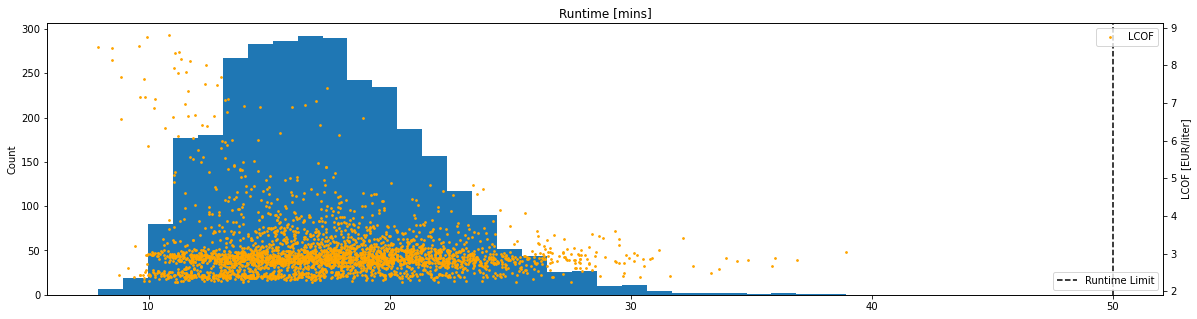

In [26]:
data = drop_outliers(results_gdf,z_score_filter=7)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
ax.hist(data.runtime/60,bins=30)
ax.axvline(runtime_limit/60,c ='k',linestyle='--',label='Runtime Limit') # Runtime limit
ax2 = plt.twinx(ax)
ax2.scatter(data.runtime/60,data.LCOF_liter,color='orange',s=3,label='LCOF');
ax.set_title('Runtime [mins]')
ax2.set_ylabel('LCOF [EUR/liter]')
ax2.legend(loc='upper right')
ax.legend(loc='lower right')
ax.set_ylabel('Count');

# Distributions

10 outlier entries were dropped.


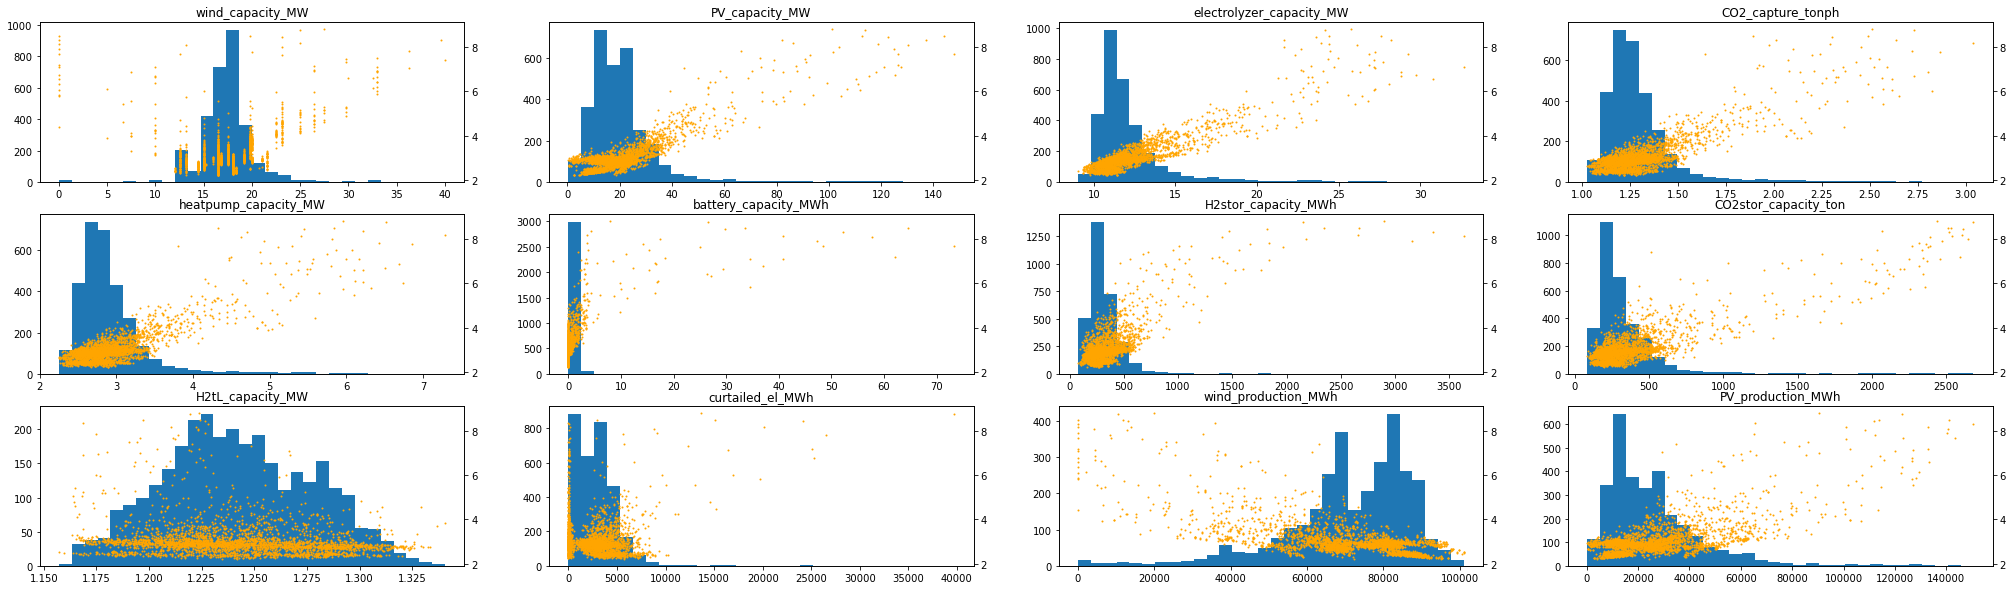

In [27]:
data = drop_outliers(results_gdf,z_score_filter=7)

metrics = ['wind_capacity_MW','PV_capacity_MW', 'electrolyzer_capacity_MW', 'CO2_capture_tonph',
       'heatpump_capacity_MW', 'battery_capacity_MWh', 'H2stor_capacity_MWh',
       'CO2stor_capacity_ton', 'H2tL_capacity_MW', 'curtailed_el_MWh',
       'wind_production_MWh', 'PV_production_MWh']
ncols=None
figsize=(35,10)
if ncols == None:
    ncols = int(np.ceil(np.sqrt(len(metrics))))
nrows = int(np.ceil(len(metrics)/ncols))
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=figsize)
axes = np.reshape(axes,(1,nrows*ncols))[0]
for i,metric in enumerate(metrics):
    axes[i].hist(data[metric],bins=30)
    ax2 = plt.twinx(axes[i])
    ax2.scatter(data[metric],data.LCOF_liter,s=1,color='orange')
    axes[i].set_title(metric)

# PV-Battery Relation

In [95]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

10 outlier entries were dropped.


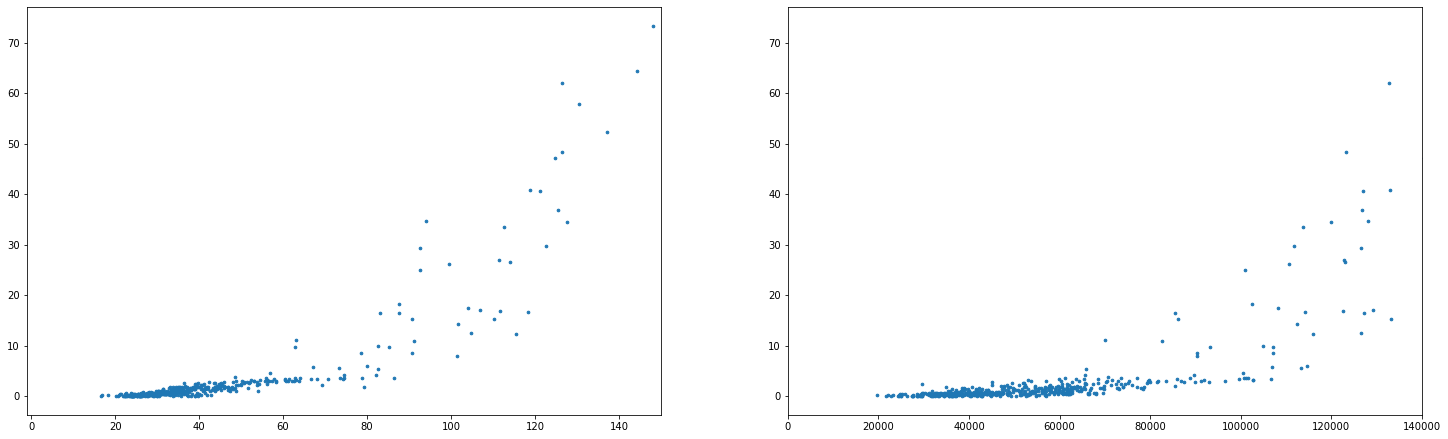

In [28]:
data = drop_outliers(results_gdf,z_score_filter=7)
data = data.loc[((data.PV_capacity_MW>0)&(data.PV_production_MWh>0)&(data.battery_capacity_MWh>0))]
fig,axes = plt.subplots(ncols=2,figsize=(25,7.5))
axes[0].scatter(data.PV_capacity_MW,data.battery_capacity_MWh,s=7)
axes[0].set_xlim(-1,150)
axes[1].scatter(data.PV_production_MWh,data.battery_capacity_MWh,s=7)
axes[1].set_xlim(-1,140000);


# 2050

In [11]:
results_path_2050 = '../../results/plant_optimization/0d7597c_2050'
countries = europe_grid.country.unique()
# countries = ['France']
results_2050 = pd.DataFrame()
for country in countries:
    df = pd.DataFrame()
    for file_glob in glob(f'{results_path_2050}/{country}*.csv'): 
        df = df.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df['sea_node'] = False
    df_sea = pd.DataFrame()
    for file_glob in glob(f'{results_path_2050}/offshore/{country}*.csv'): 
        df_sea = df_sea.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df_sea['sea_node'] = True
    df = df.append(df_sea)
    df['country'] = country
    results_2050 = results_2050.append(df)
results_gdf_2050 = gpd.GeoDataFrame(results_2050.merge(europe_grid,on=['lat','lon','country','sea_node'],how='left'))

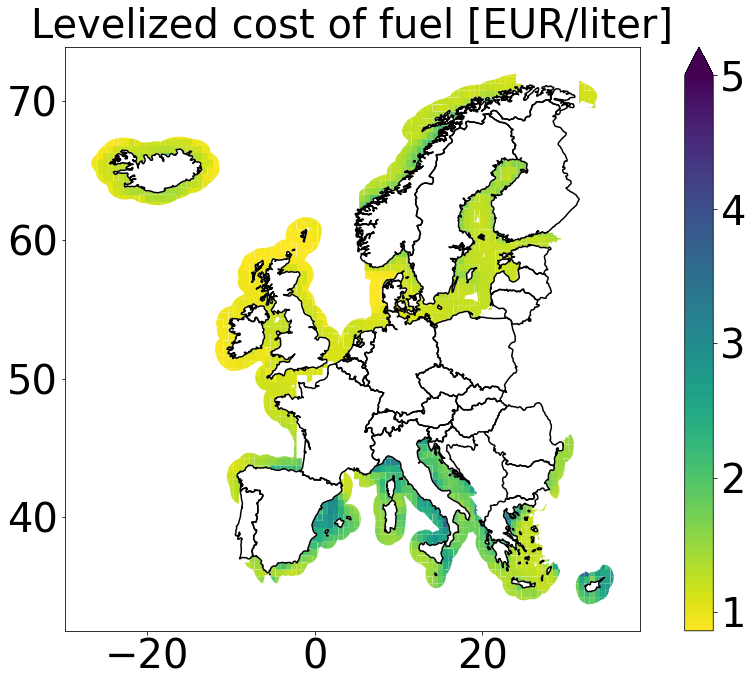

In [12]:
data = results_gdf_2050.copy()
# countries = ['Switzerland','Austria','Germany']
metrics = {'LCOF_liter':'Levelized cost of fuel [EUR/liter]'}
vmax_dict = {'LCOF_liter':5}
legend_kwds = {'extend':'max','orientation':'vertical'}
fontsize = 40
plot_results(data=data,countries=countries,metrics=metrics,vmax_dict=vmax_dict,legend_kwds=legend_kwds,figsize=(15,15),fontsize=fontsize)

2 Points reached the runtime limit
1 outlier entries were dropped.


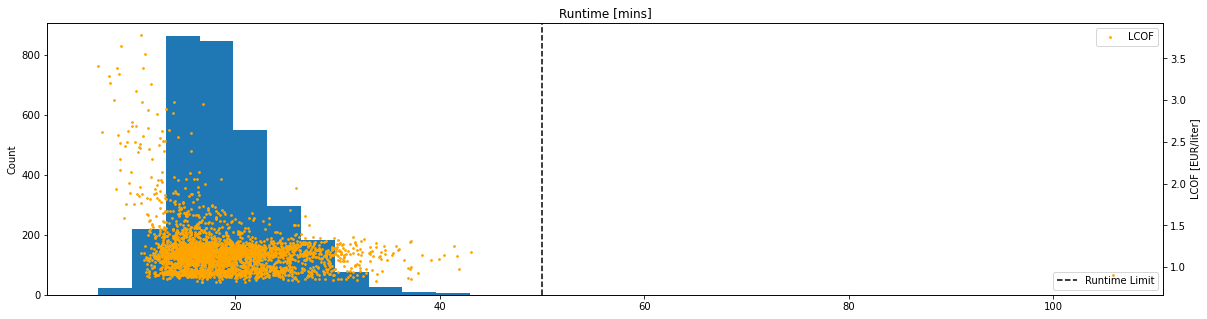

In [27]:
runtime_limit = 3000
print(len(results_gdf_2050.loc[results_gdf_2050.runtime>=runtime_limit]),'Points reached the runtime limit')

data = drop_outliers(results_gdf_2050,z_score_filter=7)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
ax.hist(data.runtime/60,bins=30)
ax.axvline(runtime_limit/60,c ='k',linestyle='--',label='Runtime Limit') # Runtime limit
ax2 = plt.twinx(ax)
ax2.scatter(data.runtime/60,data.LCOF_liter,color='orange',s=3,label='LCOF');
ax.set_title('Runtime [mins]')
ax2.set_ylabel('LCOF [EUR/liter]')
ax2.legend(loc='upper right')
ax.legend(loc='lower right')
ax.set_ylabel('Count');

# 2030

In [11]:
results_path_2030 = os.path.join(results_path,'2030')
countries = europe_grid.country.unique()
# countries = ['France']
results_2030 = pd.DataFrame()
for country in countries:
    df = pd.DataFrame()
    for file_glob in glob(f'{results_path_2030}/{country}*.csv'): 
        df = df.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df['sea_node'] = False
    df_sea = pd.DataFrame()
    for file_glob in glob(f'{results_path_2030}/offshore/{country}*.csv'): 
        df_sea = df_sea.append(pd.read_csv(file_glob,index_col=0))#.set_index(['lat','lon'])
    df_sea['sea_node'] = True
    df = df.append(df_sea)
    df['country'] = country
    results_2030 = results_2030.append(df)
results_gdf_2030 = gpd.GeoDataFrame(results_2030.merge(europe_grid,on=['lat','lon','country','sea_node'],how='left'))

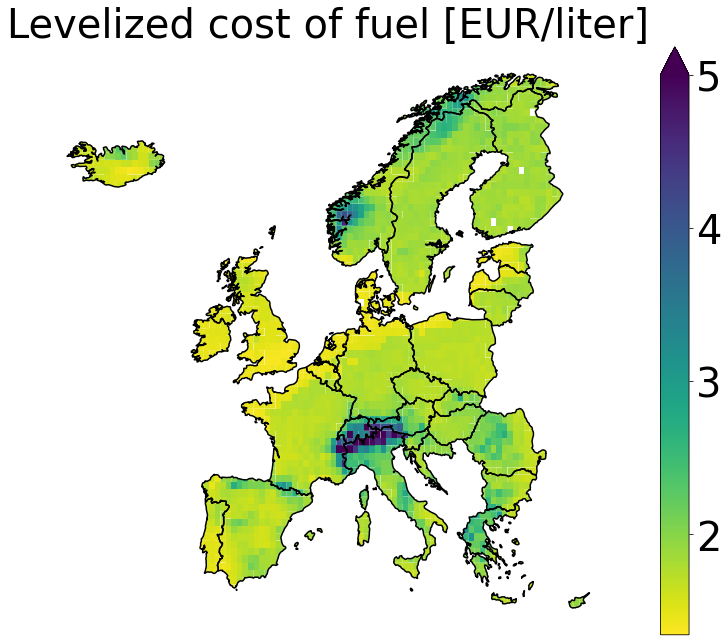

In [12]:
data = results_gdf_2030.copy()
# countries = ['Switzerland','Austria','Germany']
metrics = {'LCOF_liter':'Levelized cost of fuel [EUR/liter]'}
vmax_dict = {'LCOF_liter':5}
legend_kwds = {'extend':'max','orientation':'vertical'}
fontsize = 40
plot_results(data=data,countries=countries,metrics=metrics,vmax_dict=vmax_dict,legend_kwds=legend_kwds,figsize=(15,15),fontsize=fontsize)

0 Points reached the runtime limit
10 outlier entries were dropped.


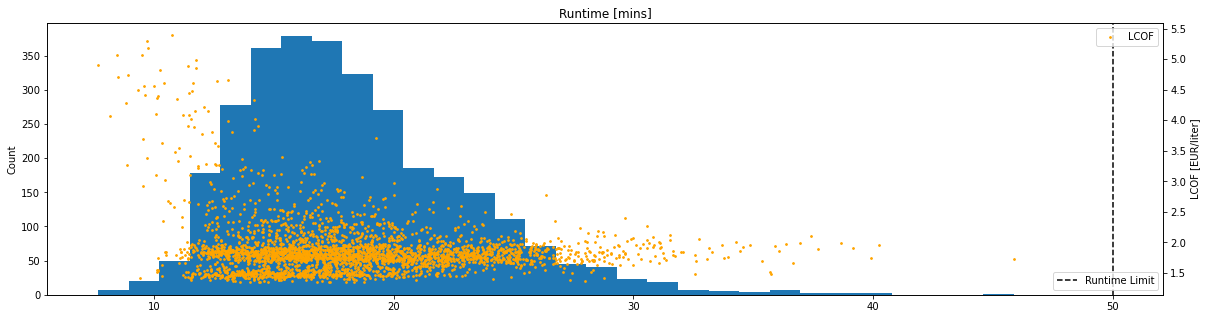

In [13]:
runtime_limit = 3000
print(len(results_gdf_2030.loc[results_gdf_2030.runtime>=runtime_limit]),'Points reached the runtime limit')

data = drop_outliers(results_gdf_2030,z_score_filter=7)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
ax.hist(data.runtime/60,bins=30)
ax.axvline(runtime_limit/60,c ='k',linestyle='--',label='Runtime Limit') # Runtime limit
ax2 = plt.twinx(ax)
ax2.scatter(data.runtime/60,data.LCOF_liter,color='orange',s=3,label='LCOF');
ax.set_title('Runtime [mins]')
ax2.set_ylabel('LCOF [EUR/liter]')
ax2.legend(loc='upper right')
ax.legend(loc='lower right')
ax.set_ylabel('Count');

# Curtailed Electricity

1 outlier entries were dropped.


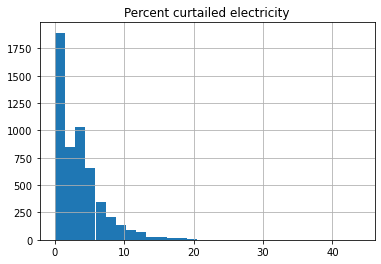

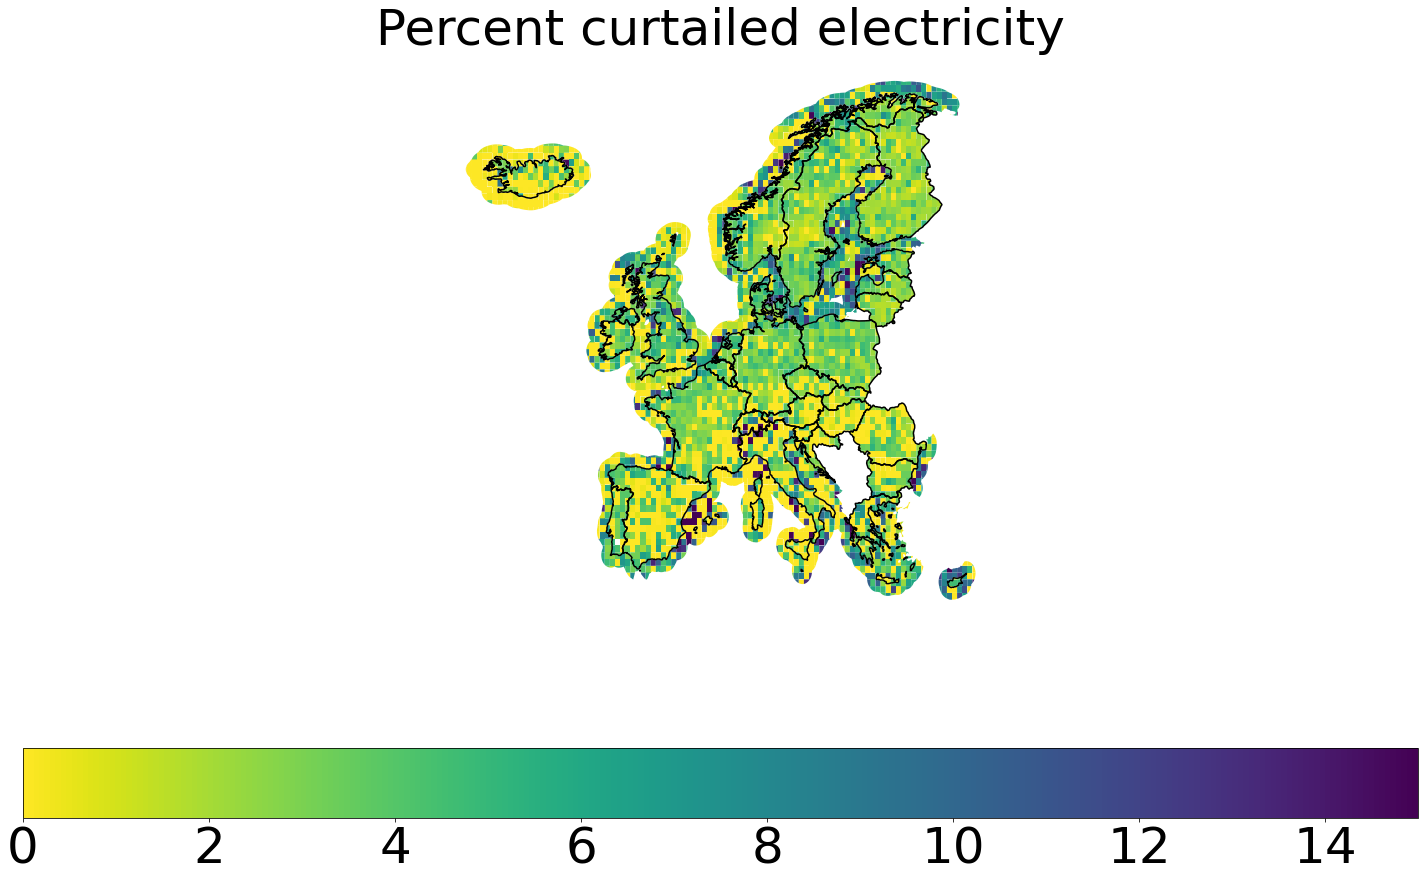

In [86]:
data = drop_outliers(results_gdf,z_score_filter==7)
data['percent_curtailed'] = data.curtailed_el_MWh/(data.PV_production_MWh+data.wind_production_MWh)*100
data.percent_curtailed.hist(bins=30)
plt.title('Percent curtailed electricity')

plot_results(data=data,countries=EU_EFTA,metrics={'percent_curtailed':'Percent curtailed electricity'},figsize=(25,15),ncols=None,fontsize=None,cmap=None,vmax_dict={'percent_curtailed':15},missing_kwds=None,legend_kwds={})

## Investigate high curtailed electricity

In [51]:
results_gdf.sort_values('curtailed_el_MWh',ascending=False).head(3)

lat     lon turbine_type  rotor_diameter  rated_turbine_power  \
50  47.5  10.625    N131/3300           131.0               3300.0   
7   46.5   6.250    N131/3300           131.0               3300.0   
6   46.0  10.000   GE120/2500           120.0               2500.0   

    wind_turbines  wind_capacity_MW  PV_capacity_MW  electrolyzer_capacity_MW  \
50           10.0              33.0       32.862530                 14.276032   
7             7.0              23.1       23.527501                 11.974207   
6             9.0              22.5      148.706301                 23.033372   

    CO2_capture_tonph  ...  PV_production_MWh       NPV_EUR     CAPEX_EUR  \
50           2.053427  ...       26089.293703  1.317408e+08  8.061807e+07   
7            1.221147  ...       30478.994253  9.712394e+07  6.211337e+07   
6            2.207753  ...      145623.739466  3.681098e+08  2.703777e+08   

       LCOF_MWh  LCOF_liter      runtime      country     PV_lat     PV_lon  \
50   804.649227    7.688870  1110.636494      Austria  47.390128  10.659047   
7    593.215669    5.668505  1008.013400  Switzerland  46.528093   6.329267   
6   2248.348945   21.484223   432.779653  Switzerland  46.239057  10.098074   

                                             geometry  
50  POLYGON ((10.93750 47.46889, 10.93750 47.25000...  
7   POLYGON ((6.42015 46.75000, 6.56250 46.75000, ...  
6   POLYGON ((10.04078 46.25000, 10.15876 46.25000...  

[3 rows x 27 columns]

In [62]:
country = 'Austria'
point = (47.5,10.625)
site = plop.Site(point,country)
plant = plop.Plant(site)
plant.operation = pd.read_parquet(f'../../results/02_plant_optimization/operation/{country}_{point[0]}_{point[1]}.parquet.gzip')
plant.operation.head()

wind_production_kWh  PV_production_kWh  battery_chr_kWh  \
time                                                                           
2016-01-01 00:30:00             0.000000                0.0              0.0   
2016-01-01 01:30:00             0.000000                0.0              0.0   
2016-01-01 02:30:00           459.361453                0.0              0.0   
2016-01-01 03:30:00          2076.424904                0.0              0.0   
2016-01-01 04:30:00          4427.816467                0.0              0.0   

                     battery_dis_kWh  battery_state_kWh  H2stor_chr_kWh  \
time                                                                      
2016-01-01 00:30:00       254.831973         550.988050    9.995834e+06   
2016-01-01 01:30:00       254.831973         275.494025    0.000000e+00   
2016-01-01 02:30:00         0.000000           0.000000    0.000000e+00   
2016-01-01 03:30:00         0.000000           0.000000    0.000000e+00   
2016-01-01 04:30:00         0.000000           0.000000    9.998338e+06   

                     H2stor_dis_kWh  H2stor_state_kWh  CO2stor_chr_kg  \
time                                                                    
2016-01-01 00:30:00    1.000000e+07      69216.976394    9.999378e+06   
2016-01-01 01:30:00    4.165566e+03      65051.410616    9.999378e+06   
2016-01-01 02:30:00    4.042848e+03      60885.844838    9.999378e+06   
2016-01-01 03:30:00    3.072610e+03      56842.996747    0.000000e+00   
2016-01-01 04:30:00    1.000000e+07      53770.386728    0.000000e+00   

                     CO2stor_dis_kg  ...    H2_el_kWh  CO2_el_kWh  \
time                                 ...                            
2016-01-01 00:30:00    1.000000e+07  ...     0.000000  254.831973   
2016-01-01 01:30:00    1.000000e+07  ...     0.000000  254.831973   
2016-01-01 02:30:00    1.000000e+07  ...   204.529480  254.831973   
2016-01-01 03:30:00    6.217736e+02  ...  1821.592931  254.831973   
2016-01-01 04:30:00    6.217736e+02  ...  4172.984494  254.831973   

                     H2tL_el_kWh  heat_el_kWh  battery_flow_kWh  \
time                                                              
2016-01-01 00:30:00          0.0          0.0       -254.831973   
2016-01-01 01:30:00          0.0          0.0       -254.831973   
2016-01-01 02:30:00          0.0          0.0          0.000000   
2016-01-01 03:30:00          0.0          0.0          0.000000   
2016-01-01 04:30:00          0.0          0.0          0.000000   

                     H2_production_kWh  CO2_consumption_kg  CO2_production_kg  \
time                                                                            
2016-01-01 00:30:00           0.000000        159891.75673      159269.983129   
2016-01-01 01:30:00           0.000000        159891.75673      159269.983129   
2016-01-01 02:30:00         122.717688        159891.75673      159269.983129   
2016-01-01 03:30:00        1092.955759        159891.75673      159269.983129   
2016-01-01 04:30:00        2503.790697        159891.75673      159269.983129   

                     CO2stor_flow_kg  fuel_production_kWh  
time                                                       
2016-01-01 00:30:00        -621.7736          1221.395576  
2016-01-01 01:30:00        -621.7736          1221.395576  
2016-01-01 02:30:00        -621.7736          1221.395576  
2016-01-01 03:30:00        -621.7736          1221.395576  
2016-01-01 04:30:00        -621.7736          1221.395576  

[5 rows x 22 columns]

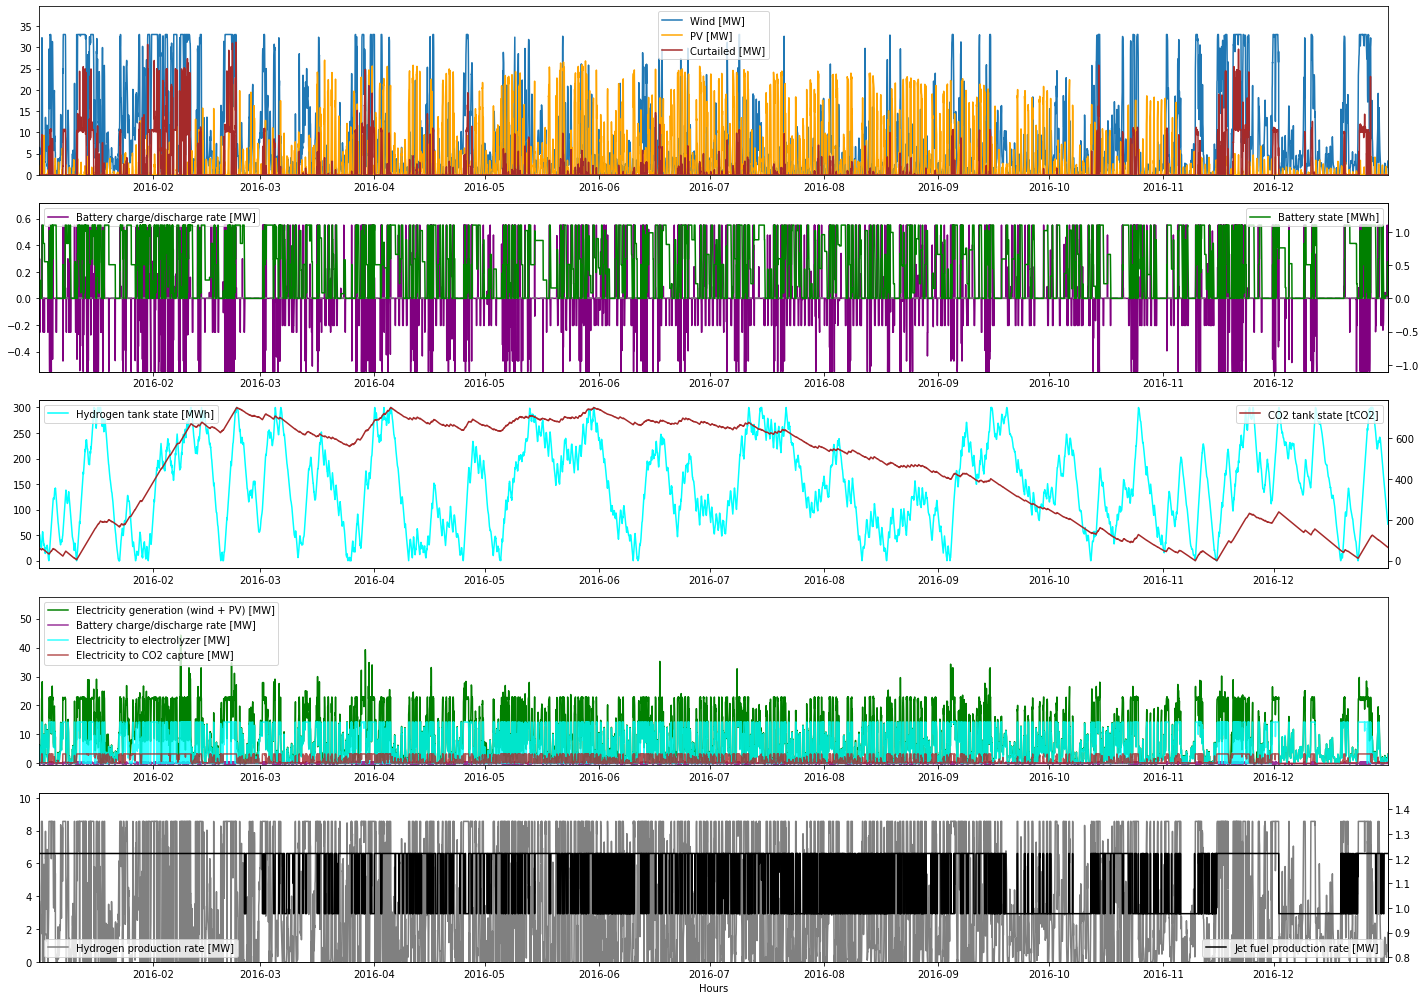

In [63]:
plot_plant_operation(plant)

AttributeError: 'DataFrame' object has no attribute 'site'

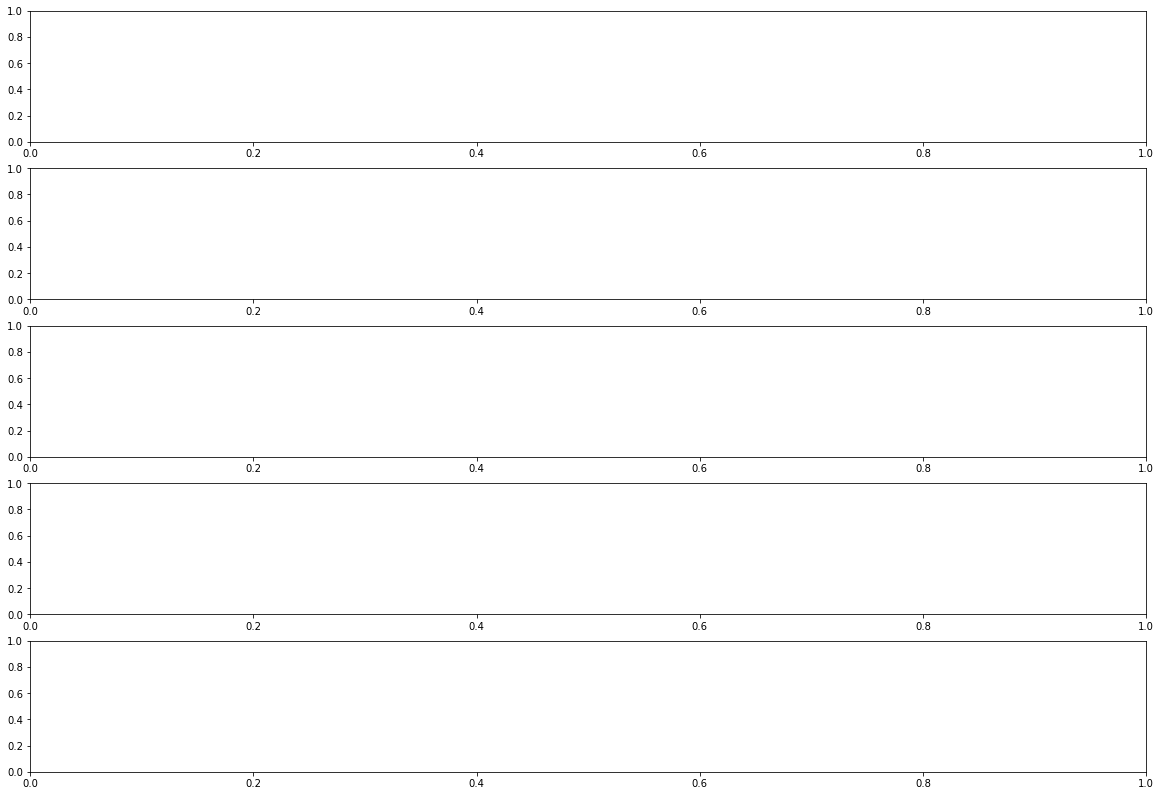